PDE
==

We are going to solve this equtation:
$\frac{\partial u}{\partial t} = -v \frac{\partial u}{\partial x}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This has error of order $\Delta t$ and $\Delta x^2$

$u^{n}_{j} = u^{n-1}_{j} - v \frac{\Delta t}{\Delta x} (u^{n-1}_{j+1} - u^{n-1}_{j-1})$

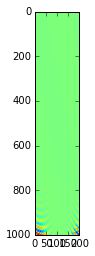

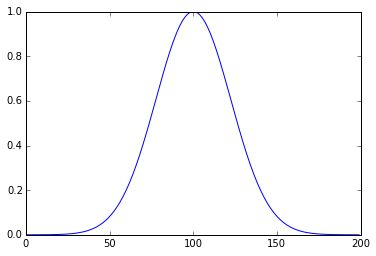

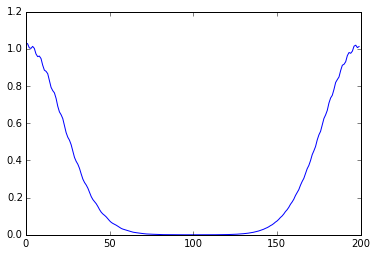

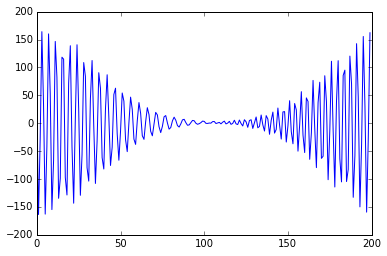

In [2]:
Nx, Nt = 200, 1000

v = 1
dt = 0.02
dx = 0.1
delta = 0.5 * v * dt / dx

u = np.zeros((Nt,Nx))

#u[0,:] = np.sin(2*np.pi*np.arange(Nx)/Nx)
u[0,:] = np.exp(-(np.arange(Nx)-100)**2/1000)
#u[0,100]=1
#u[0,101]=1

for n in range(1,Nt):
    for j in range(Nx):
        u[n,j] = u[n-1,j]  - (u[n-1,(j+1)%Nx] - u[n-1,j-1]) * delta
        
plt.imshow(u)
plt.show()
plt.plot(u[0,:])
plt.show()
plt.plot(u[Nt//2,:])
plt.show()
plt.plot(u[-1,:])
plt.show()

The solutions are unstable, using lax method and replacing $u^{n-1}_j$ with $(u^{n-1}_{j+1} + u^{n-1}_{j-1})/2$ will make the equations stable.

$u^{n}_{j} = (u^{n-1}_{j+1} + u^{n-1}_{j-1})/2 - v \frac{\Delta t}{\Delta x} (u^{n-1}_{j+1} - u^{n-1}_{j-1})$

This is equvalent to solving this equation:
$\frac{\partial u}{\partial t} = -v \frac{\partial u}{\partial x} + \frac{\Delta x^2}{2 \Delta t} \frac{\partial^2 u}{\partial x^2}$
This will make problem if we would like to look at the long term properties of the system.

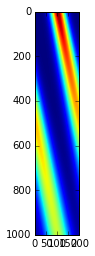

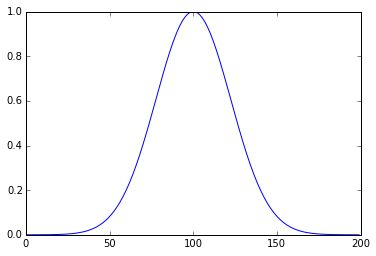

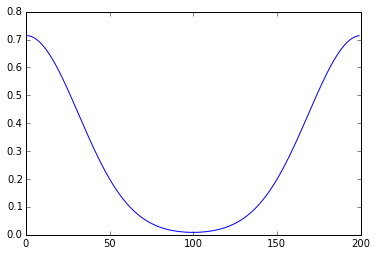

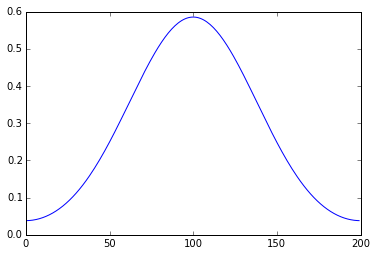

In [3]:
Nx, Nt = 200, 1000

v = 1
dt = 0.02
dx = 0.1
delta = 0.5 * v * dt / dx

u = np.zeros((Nt,Nx))

#u[0,:] = np.sin(2*np.pi*np.arange(Nx)/Nx)
u[0,:] = np.exp(-(np.arange(Nx)-100)**2/1000)
#u[0,100]=1
#u[0,101]=1

for n in range(1,Nt):
    for j in range(Nx):
        u[n,j] = (u[n-1,j-1]+u[n-1,(j+1)%Nx])/2  - (u[n-1,(j+1)%Nx] - u[n-1,j-1]) * delta
        
plt.imshow(u)
plt.show()
plt.plot(u[0,:])
plt.show()
plt.plot(u[Nt//2,:])
plt.show()
plt.plot(u[-1,:])
plt.show()

We can use leap-frog:
$u^n_{j} = u^{n-2}_{j} - v \frac{\Delta t}{\Delta x} (u^{n-1}_{j+1} - u^{n-1}_{j-1})$
mind the larger $\Delta t$ here.

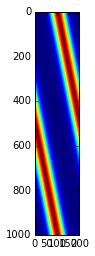

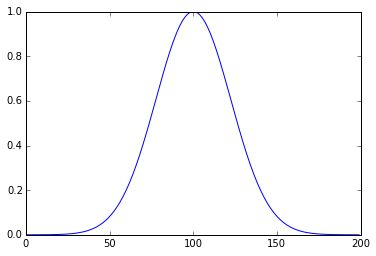

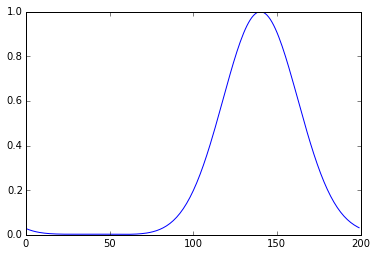

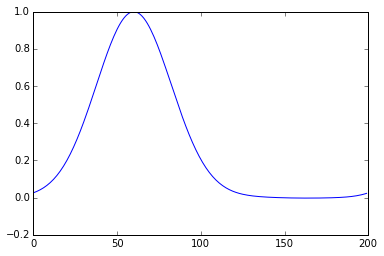

In [4]:
Nx, Nt = 200, 1000

v = 1
dt = 0.04
dx = 0.1
delta = 0.5 * v * dt / dx

u = np.zeros((Nt,Nx))

#u[0,:] = np.sin(2*np.pi*np.arange(Nx)/Nx)
u[0,:] = np.exp(-(np.arange(Nx)-100)**2/1000)
#u[0,100]=1
#u[0,101]=1

#u[1,100]=1
#u[1,101]=1

#u[0,80:110] =1 

#u[1,:] = np.exp(-(np.arange(Nx)-100)**2/500)
for j in range(Nx):
    u[1,j]=(u[0,j-1]+u[0,(j+1)%Nx])/2  - (u[0,(j+1)%Nx] - u[0,j-1]) * delta

for n in range(2,Nt):
    for j in range(Nx):
        u[n,j] = u[n-2,j] - (u[n-1,(j+1)%Nx] - u[n-1,j-1]) * delta
        
plt.imshow(u)
plt.show()
plt.plot(u[0,:])
plt.show()
plt.plot(u[200,:])
plt.show()
plt.plot(u[800,:])
plt.show()

Now solve this:
$\frac{\partial^2 u}{\partial t^2} = v^2 \frac{\partial^2 u}{\partial x^2}$